# Problem 1. Direct Monte-Carlo simulation by rejection and the curse of dimensionality

In [62]:
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt

## 1.1

In [95]:
def mc_ellipse_vol(N, dim=2):
    a, b = 2, 1
    semiaxes = np.array([a] + [b] * (dim - 1))

    low = -semiaxes * np.ones((N, 1))
    high = semiaxes * np.ones((N, 1))
    size = (N, dim)
    sample = np.random.uniform(low=low, high=high, size=size)

    proportion = ((sample**2 / semiaxes**2).sum(axis=1) <= 1).sum() / N
    sample_volume = (2 * semiaxes).prod()

    return proportion * sample_volume, proportion

## 1.2

In [96]:
def ana_ellipse_vol(dim=2):
    a, b = 2, 1
    semiaxes = np.array([a] + [b] * (dim - 1))
    return np.pi**(dim / 2) / gamma(dim / 2 + 1) * semiaxes.prod()

In [97]:
errs = []
efficiency = []
dim_range = range(2, 10)
Nrange = np.logspace(3, 6, base=10).astype(int)
for dim in dim_range:
    errs.append([])
    efficiency.append([])
    for N in Nrange:
        V, eff = mc_ellipse_vol(N, dim=dim)
        err = np.abs(V - ana_ellipse_vol(dim=dim))
        errs[-1].append(err)
        efficiency[-1].append(eff)
errs = np.array(errs).T
efficiency = np.array(efficiency).T

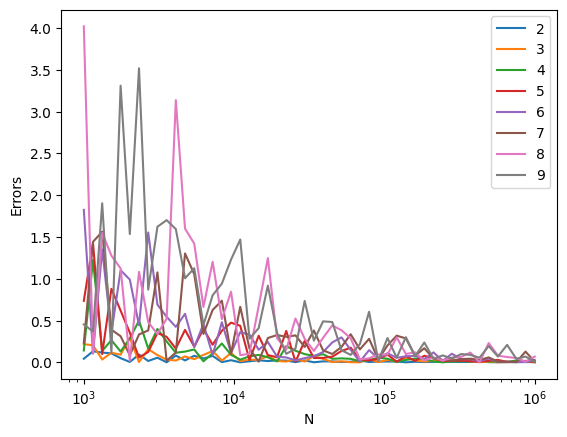

In [98]:
plt.semilogx(Nrange, errs, label=dim_range)
plt.xlabel('N')
plt.ylabel('Errors')
plt.legend();

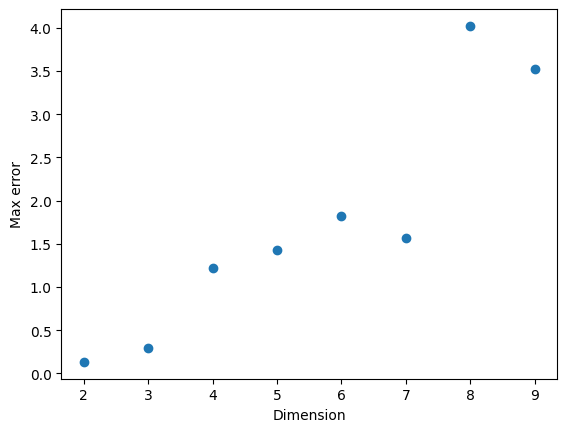

In [99]:
plt.plot(dim_range, errs.max(axis=0), 'o')
plt.xlabel('Dimension')
plt.ylabel('Max error');

## 1.3-4

In [100]:
for i, dim in enumerate(dim_range):
    print(f'Number of dimensions: {dim}')
    print(f'\tMax error: {errs[:, i].max()}')
    print(f'\tstd: {errs[:, i].std()}')
    print(f'\tEfficiency: {efficiency[:, i].mean()}')

Number of dimensions: 2
	Max error: 0.1320124140431833
	std: 0.033126523572767214
	Efficiency: 0.7844500462117217
Number of dimensions: 3
	Max error: 0.2945354268738214
	std: 0.061693863818907846
	Efficiency: 0.5227637230042995
Number of dimensions: 4
	Max error: 1.2233582400922227
	std: 0.1891833569570074
	Efficiency: 0.3085701083020615
Number of dimensions: 5
	Max error: 1.427243866176564
	std: 0.267544069050684
	Efficiency: 0.16531370791002734
Number of dimensions: 6
	Max error: 1.8245744399000614
	std: 0.40810891447285375
	Efficiency: 0.08107801349041864
Number of dimensions: 7
	Max error: 1.5632982480164443
	std: 0.37298698853677265
	Efficiency: 0.036826722583525234
Number of dimensions: 8
	Max error: 4.021424252833535
	std: 0.7723623731063936
	Efficiency: 0.015669211344781428
Number of dimensions: 9
	Max error: 3.519302047641432
	std: 0.7721562405264165
	Efficiency: 0.0063197099536368975


With growth of the number of dimensions, the perfomance drops because the ratio between the ellipse volume and the sample volume approaches 0 (this phenomena is called the curse of dimensionality).

# Problem 2. Importance sampling

Let $f(x) \propto N(0, 1)$ be our distribution of interest. If we take $g(x) \propto N(4, 1)$ as the proposal distribution, then, according to the importance sampling algorithm, we want to estimate $E[\theta(x - 4) \frac{f(x)}{g(x)}] = E[\theta(x - 4) e^{-4 x + 8}]$, where $\theta(x)$ denotes Heaviside function.

In [104]:
import numpy as np

In [112]:
N = 100000
sample = np.random.normal(size=N)
proxy_sample = np.random.normal(size=N) + 4

efficiency = (proxy_sample >= 4).sum() / N
res = ((proxy_sample >= 4) * np.exp(8 - 4 * proxy_sample)).sum() / N

print('Importance sampling approach:')
print(f'\tResult: {res}, efficiency: {efficiency}')

Importance sampling approach:
	Result: 3.1539634781828797e-05, efficiency: 0.49914


In [119]:
N = 1_000_000
samples = 0
steps = 0
z1 = np.random.uniform(size=N)
z2 = np.random.uniform(size=N)
x = np.cos(2 * np.pi * z1) * np.sqrt(-2 * np.log(z2))
res = (x >= 4).sum() / N

print('Box Muller approach:')
print(f'\tResult: {res}, efficiency: {res}')

Box Muller approach:
	Result: 2.8e-05, efficiency: 2.8e-05


The two approaches give approximately the same results, at least in terms of orders of magnitude. However, the efficiency of the importance sampling algorithm is 5 orders of magnitude higher.

# Problem 3. Metropolis-Hastings algorithm.

In [121]:
import numpy as np
import matplotlib.pyplot as plt

In [120]:
x = 0.
N = 100_000
sample = []
target = lambda x: 2 * np.exp(-2 * x)

for i in range(N):
    y = np.random.normal() + x
    if np.random.uniform() <= min(1, target(y) / target(x)) * (y >= 0):
        x = y
    sample.append(x)

sample = np.array(sample)

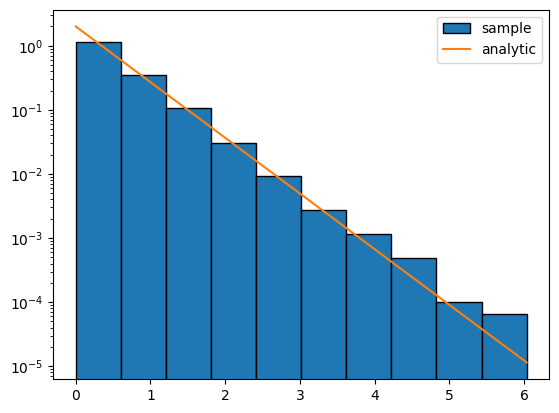

In [124]:
_, bins, _ = plt.hist(sample, density=True, edgecolor='k', label='sample')
x = np.linspace(bins.min(), bins.max())
plt.plot(x, target(x), label='analytic')
plt.legend()
plt.yscale('log')